In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
company=pd.read_csv("D:\\ExcelR Assignments\\Random Forest\\Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company['Sales_eff']=company.Sales.map(lambda x: 'High' if x>8 else 'Low')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_eff
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [5]:
data=pd.get_dummies(company,columns=['ShelveLoc','Urban','US'])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_eff,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,High,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,High,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,High,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,Low,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,Low,1,0,0,0,1,1,0


<AxesSubplot:xlabel='Advertising'>

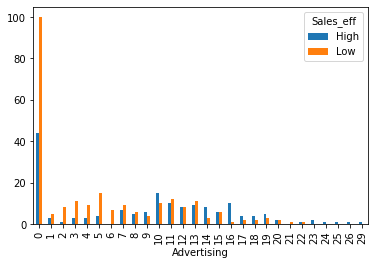

In [13]:
pd.crosstab(data.Advertising,data.Sales_eff).plot(kind="bar")

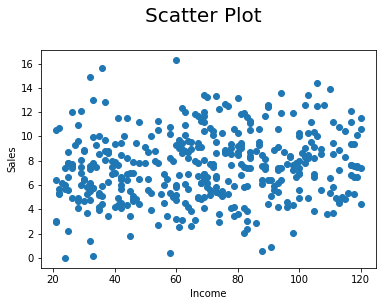

In [9]:
plt.xlabel("Income")
plt.ylabel("Sales")
plt.suptitle("Scatter Plot",size=20,y=1.03)
plt.scatter(data.Income,data.Sales)

(array([164.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 236.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

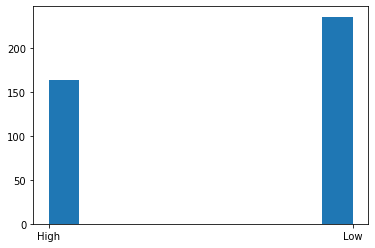

In [6]:
plt.hist(data['Sales_eff'])

In [7]:
data['Sales_eff'].value_counts()

Low     236
High    164
Name: Sales_eff, dtype: int64

In [7]:
labelencoder=LabelEncoder()
data['Sales_eff']=labelencoder.fit_transform(data['Sales_eff'])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_eff,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,0,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,1,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,1,0,0,0,1,1,0


# RandomForest Model

In [8]:
columns=['CompPrice','Income','Advertising','Population','Price','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']

In [9]:
X=data[columns]
Y=data['Sales_eff']

In [15]:
kfold=KFold(n_splits=6,random_state=10,shuffle=True)
model=RandomForestClassifier(n_estimators=10,max_features=3)
results=cross_val_score(model,X,Y,cv=kfold)

In [16]:
results.mean()*100

77.98507462686567